In [4]:
library(ggplot2)
library(gridExtra)
library(IRdisplay)
library(grid)

a <- function(x, y){
    options(repr.plot.width=x, repr.plot.height=y)
}

# Scénario 1 : différence de variance
## Création d'un dataset de classification simulé
- 50 échantillons de "A", et 50 échantillons de "B"
- **norm_noiseXX** 10 variables de bruit gaussien
- **diff_distrib01** différentes distributions normales entre "A" et "B"
- **diff_distrib02** différentes distributions normales entre "A" et "B"
- **diffVar01** distribution normale de variance 1 pour "A" et distribution normale de variance 5 pour "B"

In [5]:
# Samples
df_simu_classif_diffVar = data.frame(y=c(rep("A",50), rep("B",50)))
# Noise columns
set.seed(12)
noise_columns <- paste0("norm_noise", sprintf("%02d", 1:10))
df_simu_classif_diffVar[noise_columns] <- lapply(noise_columns, function(column_name) {
    mean <- runif(1, min = -10, max = 10)
    sd <- runif(1, min = 1, max = 5)
    rnorm(nrow(df_simu_classif_diffVar), mean = mean, sd = sd)
})

# Distribution columns
rand_mean = 2
rand_sd = 2
mask_group = df_simu_classif_diffVar[["y"]] == "A"
df_simu_classif_diffVar[["diff_distrib01"]][mask_group] <- rnorm(sum(mask_group), mean = rand_mean, sd = rand_sd)
mask_group = df_simu_classif_diffVar[["y"]] == "B"
df_simu_classif_diffVar[["diff_distrib01"]][mask_group] <- rnorm(sum(mask_group), mean = -rand_mean, sd = rand_sd)

rand_mean = 4
rand_sd = 4
mask_group = df_simu_classif_diffVar[["y"]] == "A"
df_simu_classif_diffVar[["diff_distrib02"]][mask_group] <- rnorm(sum(mask_group), mean = rand_mean, sd = rand_sd)
mask_group = df_simu_classif_diffVar[["y"]] == "B"
df_simu_classif_diffVar[["diff_distrib02"]][mask_group] <- rnorm(sum(mask_group), mean = -rand_mean, sd = rand_sd)

rand_mean = 1
rand_sd1 = 1
rand_sd2 = 5
mask_group = df_simu_classif_diffVar[["y"]] == "A"
df_simu_classif_diffVar[["diffVar01"]][mask_group] <- rnorm(sum(mask_group), mean = rand_mean, sd = rand_sd1)
mask_group = df_simu_classif_diffVar[["y"]] == "B"
df_simu_classif_diffVar[["diffVar01"]][mask_group] <- rnorm(sum(mask_group), mean = -rand_mean, sd = rand_sd2)

In [6]:
write.table(df_simu_classif_diffVar, file = "data/scen_ds/classif_diffVar.txt")

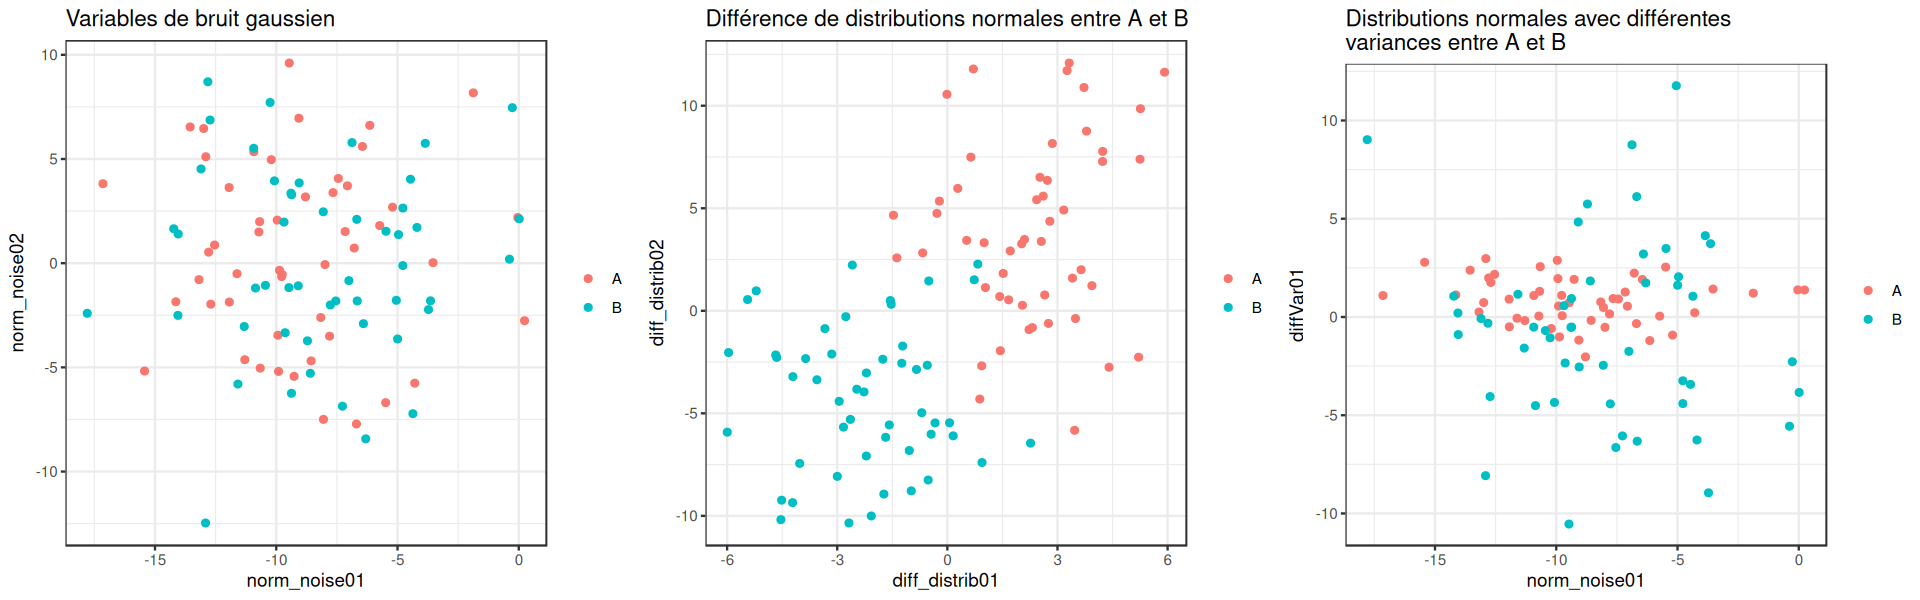

In [7]:
a(16,5)
p0 <- ggplot(df_simu_classif_diffVar, aes(x=norm_noise01, y=norm_noise02, color=y)) +
    geom_point() + ggtitle("Variables de bruit gaussien") + theme_bw() + theme(legend.title=element_blank())
p1 <- ggplot(df_simu_classif_diffVar, aes(x=diff_distrib01, y=diff_distrib02, color=y)) +
    geom_point() + ggtitle("Différence de distributions normales entre A et B") + theme_bw() + theme(legend.title=element_blank())
p2 <- ggplot(df_simu_classif_diffVar, aes(x=norm_noise01, y=diffVar01, color=y)) +
    geom_point() + ggtitle("Distributions normales avec différentes\nvariances entre A et B") + theme_bw() + theme(legend.title=element_blank())
pscenar1 <- grid.arrange(p0, p1, p2, ncol = 3, nrow = 1)

# Scénario 2 : distribution bimodale
## Création d'un dataset de classification simulé
- 50 échantillons de "A", et 50 échantillons de "B"
- **norm_noiseXX** 10 variables de bruit gaussien
- **diff_distrib01** différentes distributions normales entre "A" et "B"
- **diff_distrib02** différentes distributions normales entre "A" et "B"
- **bidistrib01** distribution normale pour "A" et distribution normale bimodale pour "B"

In [8]:
# Samples
df_simu_classif_bimod = data.frame(y=c(rep("A",50), rep("B",50)))
# Noise columns
set.seed(123)
noise_columns <- paste0("norm_noise", sprintf("%02d", 1:10))
df_simu_classif_bimod[noise_columns] <- lapply(noise_columns, function(column_name) {
    mean <- runif(1, min = -10, max = 10)
    sd <- runif(1, min = 1, max = 5)
    rnorm(nrow(df_simu_classif_bimod), mean = mean, sd = sd)
})



In [9]:
rand_mean = 3
rand_sd = 2
mask_group = df_simu_classif_bimod[["y"]] == "A"
df_simu_classif_bimod[["diff_distrib01"]][mask_group] <- rnorm(sum(mask_group), mean = rand_mean, sd = rand_sd)
mask_group = df_simu_classif_bimod[["y"]] == "B"
df_simu_classif_bimod[["diff_distrib01"]][mask_group] <- rnorm(sum(mask_group), mean = -rand_mean, sd = rand_sd)

rand_mean = 5
rand_sd = 2
mask_group = df_simu_classif_bimod[["y"]] == "A"
df_simu_classif_bimod[["diff_distrib02"]][mask_group] <- rnorm(sum(mask_group), mean = rand_mean, sd = rand_sd)
rand_mean = -4
rand_sd = 4
mask_group = df_simu_classif_bimod[["y"]] == "B"
df_simu_classif_bimod[["diff_distrib02"]][mask_group] <- rnorm(sum(mask_group), mean = rand_mean, sd = rand_sd)

In [10]:
c_x1 <- rnorm(n = 25, mean = 1, sd = 1)
c_x2 <- rnorm(n = 25, mean = 11, sd = 2)
c_x <- c(c_x1, c_x2)
c_y <- rnorm(n = 50, mean = 5, sd = 1)
df_simu_classif_bimod$biDistrib = c(c_x, c_y)

In [11]:
write.table(df_simu_classif_bimod, file = "data/scen_ds/classif_bimod.txt")

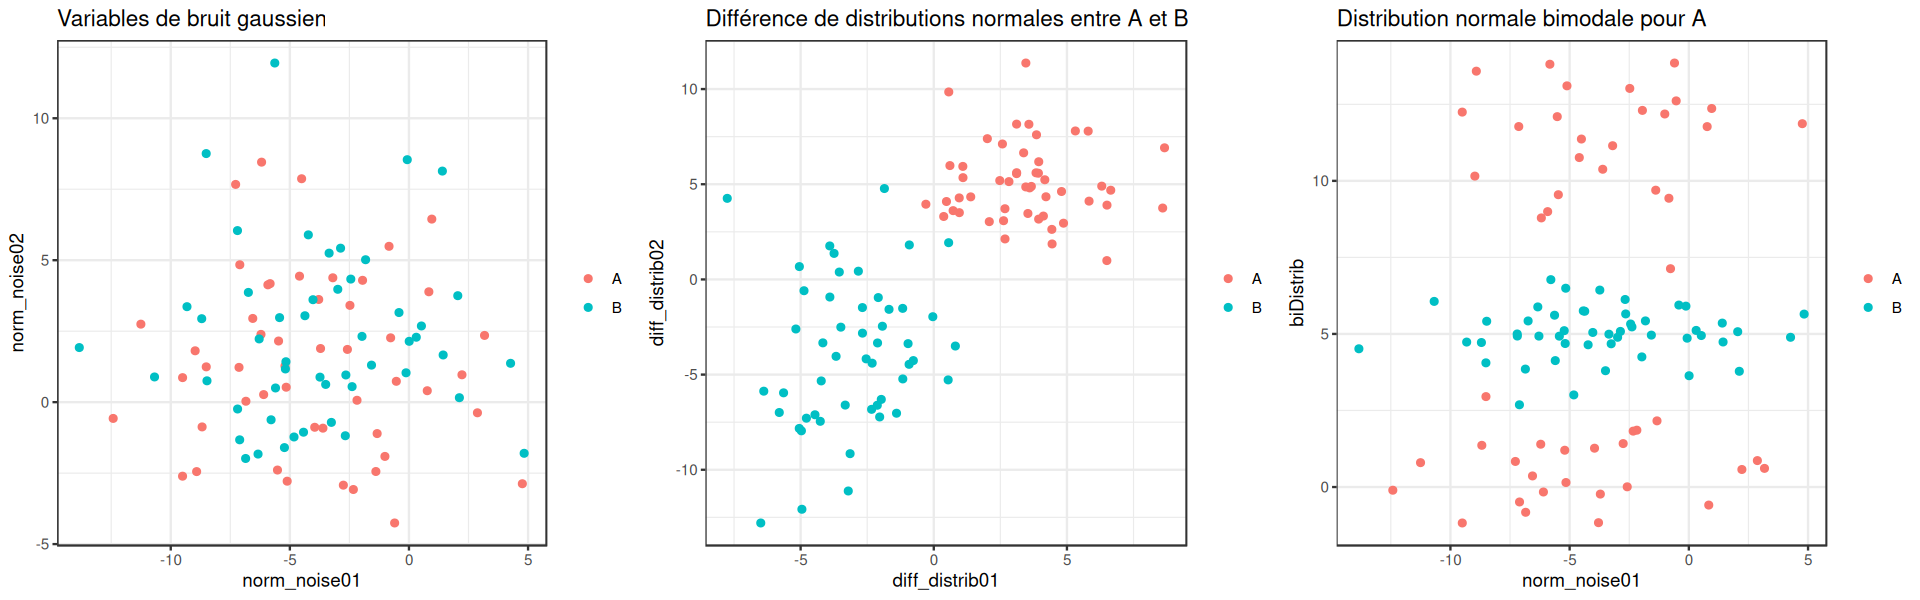

In [12]:
a(16,5)
p0 <- ggplot(df_simu_classif_bimod, aes(x=norm_noise01, y=norm_noise02, color=y)) +
    geom_point() + ggtitle("Variables de bruit gaussien") + theme_bw() + theme(legend.title=element_blank())
p1 <- ggplot(df_simu_classif_bimod, aes(x=diff_distrib01, y=diff_distrib02, color=y)) +
    geom_point() + ggtitle("Différence de distributions normales entre A et B") + theme_bw() + theme(legend.title=element_blank())
p2 <- ggplot(df_simu_classif_bimod, aes(x=norm_noise01, y=biDistrib, color=y)) +
    geom_point() + ggtitle("Distribution normale bimodale pour A") + theme_bw() + theme(legend.title=element_blank())
pscenar2 <- grid.arrange(p0, p1, p2, ncol = 3, nrow = 1)

# Scénario 3 : relations entre variables
## Création d'un dataset de classification simulé
- 50 échantillons de "A", et 50 échantillons de "B"
- **norm_noiseXX** 10 variables de bruit gaussien
- **diff_distrib01** différentes distributions normales entre "A" et "B"
- **diff_distrib02** différentes distributions normales entre "A" et "B"
- **relVar01** distribution normale de moyenne 2 pour "A" et de moyenne -2 pour "B" si **relVar02** > 0, et distribution normale de moyenne -2 pour "A" et de moyenne 2 pour "B" sinon
- **relVar02** distribution normale de moyenne -2 pour "A" et de moyenne 2 pour "B" si **relVar02** > 0, et distribution normale de moyenne 2 pour "A" et de moyenne -2 pour "B" sinon

In [13]:
# Samples
df_simu_classif_diffVar = data.frame(y=c(rep("A",50), rep("B",50)))
# Noise columns
set.seed(1234)
noise_columns <- paste0("norm_noise", sprintf("%02d", 1:10))
df_simu_classif_diffVar[noise_columns] <- lapply(noise_columns, function(column_name) {
    mean <- runif(1, min = -10, max = 10)
    sd <- runif(1, min = 1, max = 5)
    rnorm(nrow(df_simu_classif_diffVar), mean = mean, sd = sd)
})

# Distribution columns
rand_mean = 2
rand_sd = 2
mask_group = df_simu_classif_diffVar[["y"]] == "A"
df_simu_classif_diffVar[["diff_distrib01"]][mask_group] <- rnorm(sum(mask_group), mean = rand_mean, sd = rand_sd)
mask_group = df_simu_classif_diffVar[["y"]] == "B"
df_simu_classif_diffVar[["diff_distrib01"]][mask_group] <- rnorm(sum(mask_group), mean = -rand_mean, sd = rand_sd)

rand_mean = 4
rand_sd = 4
mask_group = df_simu_classif_diffVar[["y"]] == "A"
df_simu_classif_diffVar[["diff_distrib02"]][mask_group] <- rnorm(sum(mask_group), mean = rand_mean, sd = rand_sd)
mask_group = df_simu_classif_diffVar[["y"]] == "B"
df_simu_classif_diffVar[["diff_distrib02"]][mask_group] <- rnorm(sum(mask_group), mean = -rand_mean, sd = rand_sd)

mask_group <- 1:25
df_simu_classif_diffVar[['relVar01']][mask_group] <- rnorm(length(mask_group), mean = 2, sd = 1)
df_simu_classif_diffVar[['relVar02']][mask_group] <- rnorm(length(mask_group), mean = 2, sd = 1)

mask_group <- 26:50
df_simu_classif_diffVar[['relVar01']][mask_group] <- rnorm(length(mask_group), mean = -2, sd = 1)
df_simu_classif_diffVar[['relVar02']][mask_group] <- rnorm(length(mask_group), mean = -2, sd = 1)

mask_group <- 51:75
df_simu_classif_diffVar[['relVar01']][mask_group] <- rnorm(length(mask_group), mean = -2, sd = 1)
df_simu_classif_diffVar[['relVar02']][mask_group] <- rnorm(length(mask_group), mean = 2, sd = 1)

mask_group = 76:100
df_simu_classif_diffVar[['relVar01']][mask_group] <- rnorm(length(mask_group), mean = 2, sd = 1)
df_simu_classif_diffVar[['relVar02']][mask_group] <- rnorm(length(mask_group), mean = -2, sd = 1)

noise_columns <- paste0("norm_noise", sprintf("%02d", 1:1))
df_simu_classif_diffVar[noise_columns] <- lapply(noise_columns, function(column_name) {
    mean <- runif(1, min = -10, max = 10)
    sd <- runif(1, min = 1, max = 5)
    rnorm(nrow(df_simu_classif_diffVar), mean = mean, sd = sd)
})

In [14]:
write.table(df_simu_classif_diffVar, file = "data/scen_ds/classif_relVar.txt")

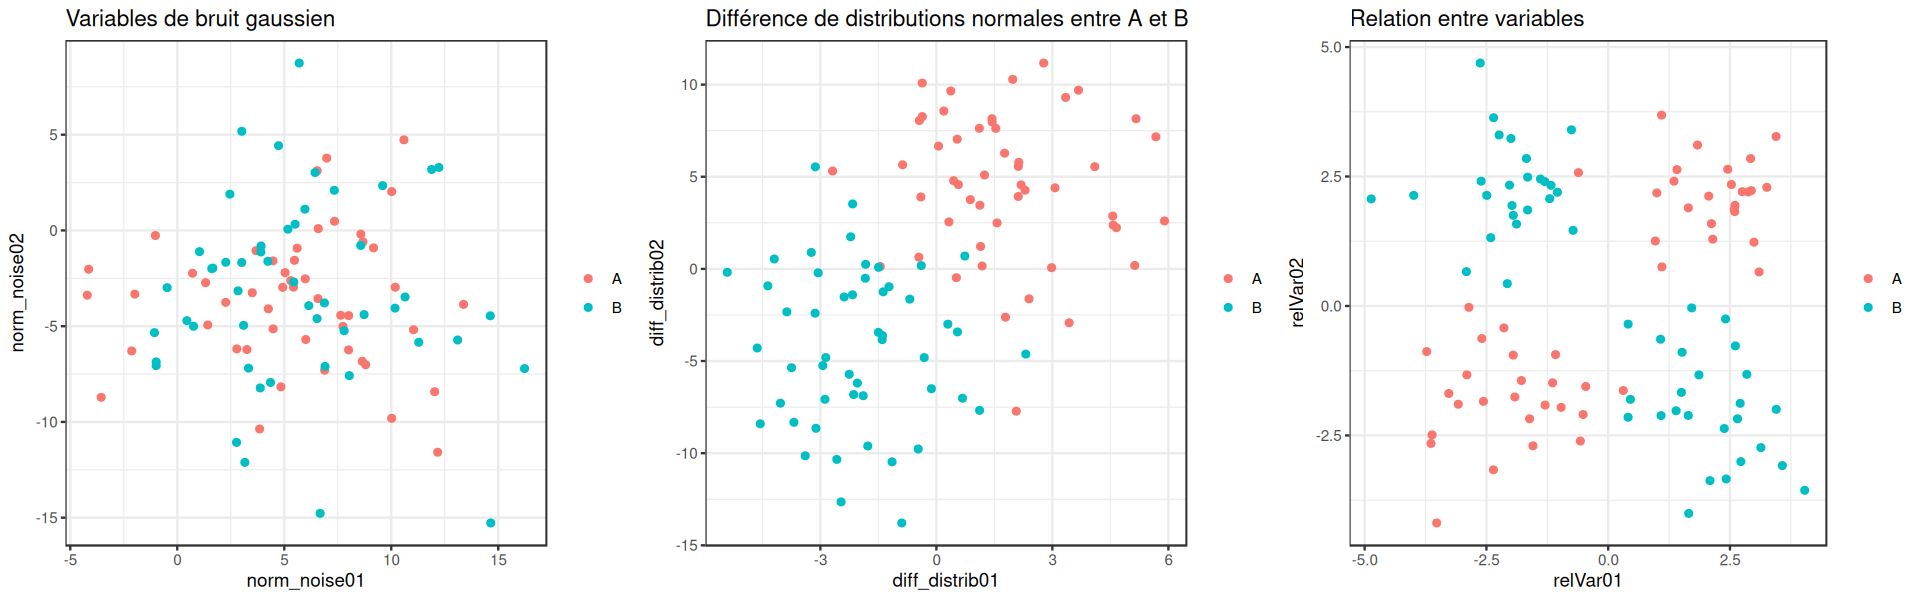

In [15]:
a(16,5)
p0 <- ggplot(df_simu_classif_diffVar, aes(x=norm_noise01, y=norm_noise02, color=y)) +
    geom_point() + ggtitle("Variables de bruit gaussien") + theme_bw() + theme(legend.title=element_blank())
p1 <- ggplot(df_simu_classif_diffVar, aes(x=diff_distrib01, y=diff_distrib02, color=y)) +
    geom_point() + ggtitle("Différence de distributions normales entre A et B") + theme_bw() + theme(legend.title=element_blank())
p2 <- ggplot(df_simu_classif_diffVar, aes(x=relVar01, y=relVar02, color=y)) +
    geom_point() + ggtitle("Relation entre variables") + theme_bw() + theme(legend.title=element_blank())
pscenar3 <- grid.arrange(p0, p1, p2, ncol = 3, nrow = 1)

# Scénario 4 : cercles concentriques
## Création d'un dataset de classification simulé
- 50 échantillons de "A", et 50 échantillons de "B"
- **norm_noiseXX** 10 variables de bruit gaussien
- **diff_distrib01** différentes distributions normales entre "A" et "B"
- **diff_distrib02** différentes distributions normales entre "A" et "B"
- **relVar01** et **relVar02** variables formant des cercles concentriques pour "A" et "B"

In [16]:
# Samples
df_simu_classif_circle = data.frame(y=c(rep("A",50), rep("B",50)))
# Noise columns
set.seed(12345)
noise_columns <- paste0("norm_noise", sprintf("%02d", 1:10))
df_simu_classif_circle[noise_columns] <- lapply(noise_columns, function(column_name) {
    mean <- runif(1, min = -10, max = 10)
    sd <- runif(1, min = 1, max = 5)
    rnorm(nrow(df_simu_classif_circle), mean = mean, sd = sd)
})

# Distribution columns
rand_mean = 2
rand_sd = 2
mask_group = df_simu_classif_circle[["y"]] == "A"
df_simu_classif_circle[["diff_distrib01"]][mask_group] <- rnorm(sum(mask_group), mean = rand_mean, sd = rand_sd)
mask_group = df_simu_classif_circle[["y"]] == "B"
df_simu_classif_circle[["diff_distrib01"]][mask_group] <- rnorm(sum(mask_group), mean = -rand_mean, sd = rand_sd)

rand_mean = 4
rand_sd = 4
mask_group = df_simu_classif_circle[["y"]] == "A"
df_simu_classif_circle[["diff_distrib02"]][mask_group] <- rnorm(sum(mask_group), mean = rand_mean, sd = rand_sd)
mask_group = df_simu_classif_circle[["y"]] == "B"
df_simu_classif_circle[["diff_distrib02"]][mask_group] <- rnorm(sum(mask_group), mean = -rand_mean, sd = rand_sd)

# Create concentric circles for class A
n_outer <- 35
n_inner <- 15

# Outer circle (radius 4)
theta_outer <- seq(0, 2*pi, length.out = n_outer)
outer_x <- 4 * cos(theta_outer) + rnorm(n_outer, mean = 0, sd = 0.2)
outer_y <- 4 * sin(theta_outer) + rnorm(n_outer, mean = 0, sd = 0.2)

# Inner circle (radius 0.5) 
theta_inner <- runif(n_inner, 0, 2*pi)
inner_x <- 0.5 * cos(theta_inner) + rnorm(n_inner, mean = 0, sd = 0.2)
inner_y <- 0.5 * sin(theta_inner) + rnorm(n_inner, mean = 0, sd = 0.2)

# Combine circles for class A
df_simu_classif_circle[['relVar01']][df_simu_classif_circle$y == "A"] <- c(outer_x, inner_x)
df_simu_classif_circle[['relVar02']][df_simu_classif_circle$y == "A"] <- c(outer_y, inner_y)

# Circle for class B (radius 2.5)
theta_B <- seq(0, 2*pi, length.out = 50)
df_simu_classif_circle[['relVar01']][df_simu_classif_circle$y == "B"] <- 2.5 * cos(theta_B) + rnorm(50, mean = 0, sd = 0.2)
df_simu_classif_circle[['relVar02']][df_simu_classif_circle$y == "B"] <- 2.5 * sin(theta_B) + rnorm(50, mean = 0, sd = 0.2)


In [17]:
write.table(df_simu_classif_circle, file = "data/scen_ds/classif_circle.txt")

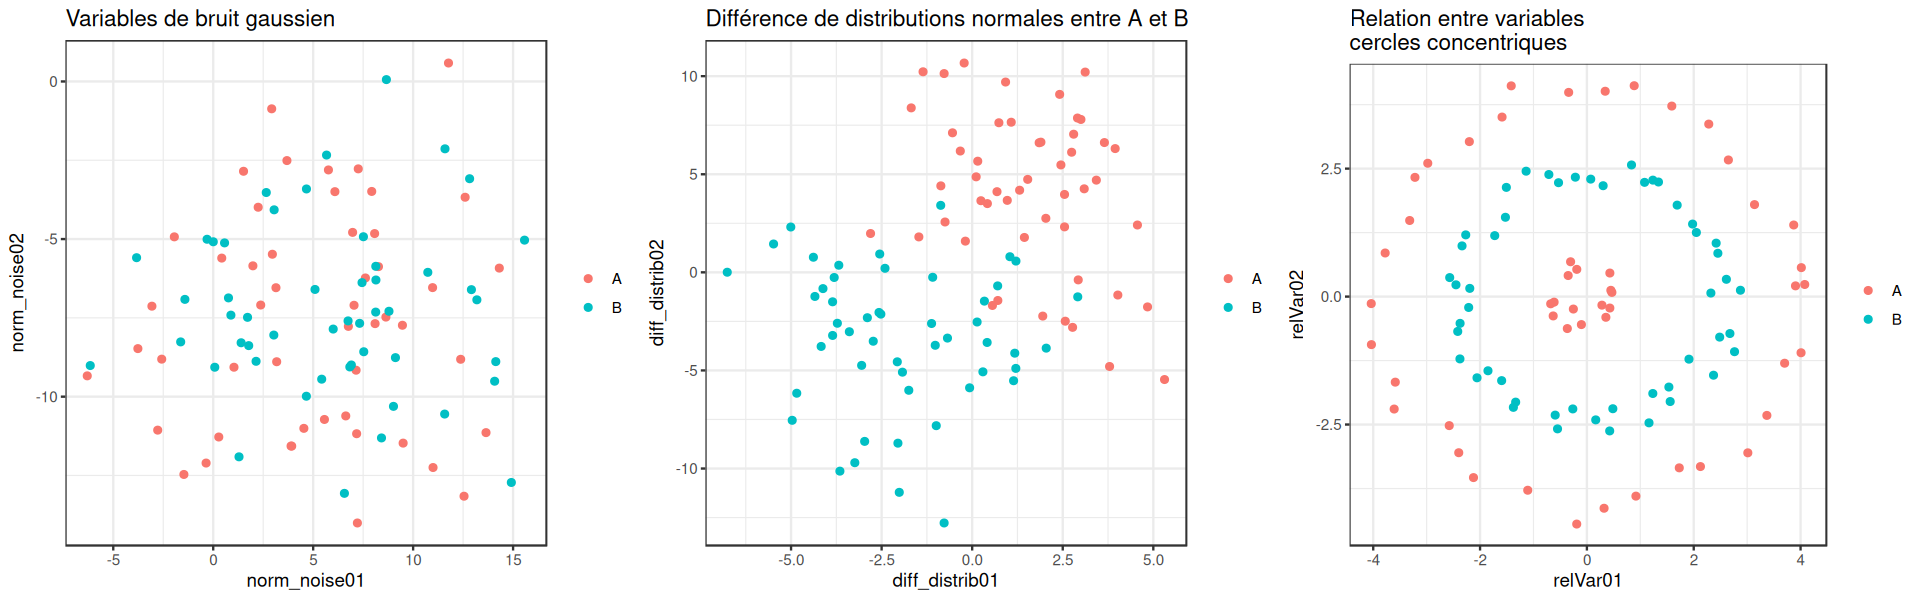

In [18]:
a(16,5)
p0 <- ggplot(df_simu_classif_circle, aes(x=norm_noise01, y=norm_noise02, color=y)) +
    geom_point() + ggtitle("Variables de bruit gaussien") + theme_bw() + theme(legend.title=element_blank())
p1 <- ggplot(df_simu_classif_circle, aes(x=diff_distrib01, y=diff_distrib02, color=y)) +
    geom_point() + ggtitle("Différence de distributions normales entre A et B") + theme_bw() + theme(legend.title=element_blank())
p2 <- ggplot(df_simu_classif_circle, aes(x=relVar01, y=relVar02, color=y)) +
    geom_point() + ggtitle("Relation entre variables\ncercles concentriques") + theme_bw() + theme(legend.title=element_blank())
pscenar4 <- grid.arrange(p0, p1, p2, ncol = 3, nrow = 1)

# Scénario 5 : paraboles
## Création d'un dataset de regression simulé
- 50 échantillons de "A", et 50 échantillons de "B"
- **norm_noiseXX** 10 variables de bruit gaussien
- **unif_noiseXX** 10 variables de bruit uniforme
- **y** parabole calculée à partir de **norm_noise01**

In [19]:
transfo_parab <- function(xs){
    x1 <- min(xs)
    x2 <- max(xs)
    h <- (x1 + x2) / 2
    k <- max(xs)/2
    a <- k / ((h - x1) * (h - x2))
    
    y <- a * (xs - x1) * (xs - x2)
    
    return (y)
}

In [20]:
# Samples
df_simu_classif_regress_parab = data.frame(y=c(rep("A",50), rep("B",50)))
# Noise columns
set.seed(123456)
noise_columns <- paste0("norm_noise", sprintf("%02d", 1:10))
df_simu_classif_regress_parab[noise_columns] <- lapply(noise_columns, function(column_name) {
    mean <- runif(1, min = -10, max = 10)
    sd <- runif(1, min = 1, max = 5)
    rnorm(nrow(df_simu_classif_regress_parab), mean = mean, sd = sd)
})

noise_columns <- paste0("unif_noise", sprintf("%02d", 1:10))
df_simu_classif_regress_parab[noise_columns] <- lapply(noise_columns, function(column_name) {
    rand_min <- runif(1, min = -10, max = 0)
    rand_max <- runif(1, min = 0, max = 10)
    runif(nrow(df_simu_classif_regress_parab), min = rand_min, max = rand_max)
})

df_simu_classif_regress_parab$y <- transfo_parab(df_simu_classif_regress_parab$norm_noise01)


In [21]:
write.table(df_simu_classif_regress_parab, file = "data/scen_ds/regress_parab.txt")

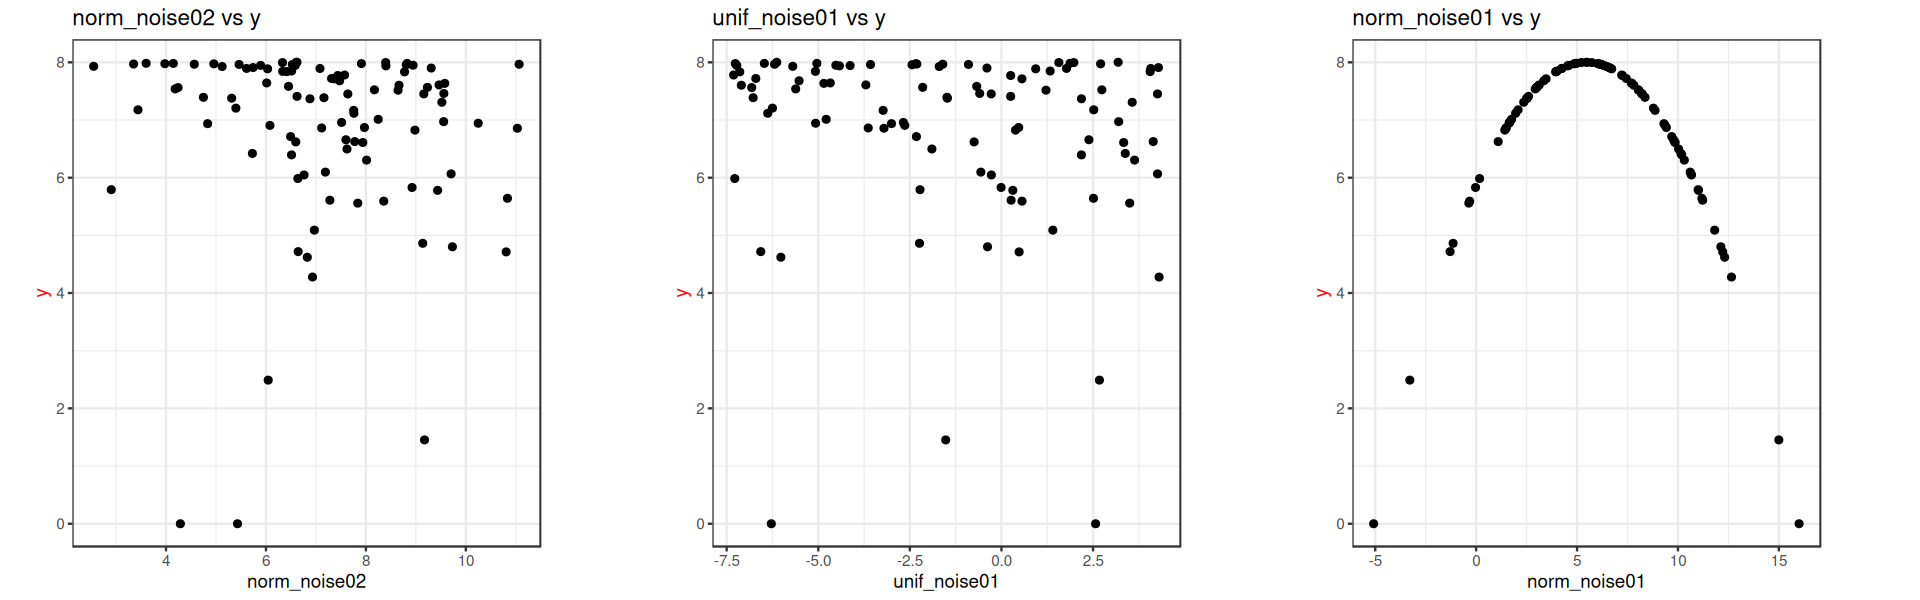

In [22]:
a(16,5)
p0 <- ggplot(df_simu_classif_regress_parab, aes(x=norm_noise02, y=y)) +
    geom_point() + ggtitle("norm_noise02 vs y") + theme_bw() + theme(legend.title=element_blank()) +
    theme(axis.title.y = element_text(color = "red")) +
    theme(plot.margin = margin(5, 60, 5, 20))

p1 <- ggplot(df_simu_classif_regress_parab, aes(x=unif_noise01, y=y)) +
    geom_point() + ggtitle("unif_noise01 vs y") + theme_bw() + theme(legend.title=element_blank()) +
    theme(axis.title.y = element_text(color = "red")) +
    theme(plot.margin = margin(5, 60, 5, 20))

p2 <- ggplot(df_simu_classif_regress_parab, aes(x=norm_noise01, y=y)) +
    geom_point() + ggtitle("norm_noise01 vs y") + theme_bw() + theme(legend.title=element_blank()) +
    theme(axis.title.y = element_text(color = "red")) +
    theme(plot.margin = margin(5, 60, 5, 20))

pscenar5 <- grid.arrange(p0, p1, p2, ncol = 3, nrow = 1, widths = c(1,1,1), padding = unit(2, "line"))


# Scénario 6 : 
## Création d'un dataset de regression simulé
- 50 échantillons de "A", et 50 échantillons de "B"
- **norm_noiseXX** 10 variables de bruit gaussien
- **unif_noiseXX** 10 variables de bruit uniforme
# - **y** variable cible calculée comme le produit de sin(x) et x où x est unif_noise01

In [23]:
croissSinusoid <- function(x){
    return (sin(x) * x)
}

In [24]:
# Samples
df_simu_classif_regress_sinus = data.frame(y=c(rep("A",50), rep("B",50)))
# Noise columns
set.seed(1234567)
noise_columns <- paste0("norm_noise", sprintf("%02d", 1:10))
df_simu_classif_regress_sinus[noise_columns] <- lapply(noise_columns, function(column_name) {
    mean <- runif(1, min = -10, max = 10)
    sd <- runif(1, min = 1, max = 5)
    rnorm(nrow(df_simu_classif_regress_sinus), mean = mean, sd = sd)
})

df_simu_classif_regress_sinus[['unif_noise01']] <- runif(nrow(df_simu_classif_regress_sinus), min = 0, max = 10)
noise_columns <- paste0("unif_noise", sprintf("%02d", 2:10))
df_simu_classif_regress_sinus[noise_columns] <- lapply(noise_columns, function(column_name) {
    rand_min <- runif(1, min = -10, max = 0)
    rand_max <- runif(1, min = 0, max = 10)
    runif(nrow(df_simu_classif_regress_sinus), min = rand_min, max = rand_max)
})

df_simu_classif_regress_sinus$y <- croissSinusoid(df_simu_classif_regress_sinus$unif_noise01)



In [25]:
write.table(df_simu_classif_regress_sinus, file = "data/scen_ds/regress_sinus.txt")

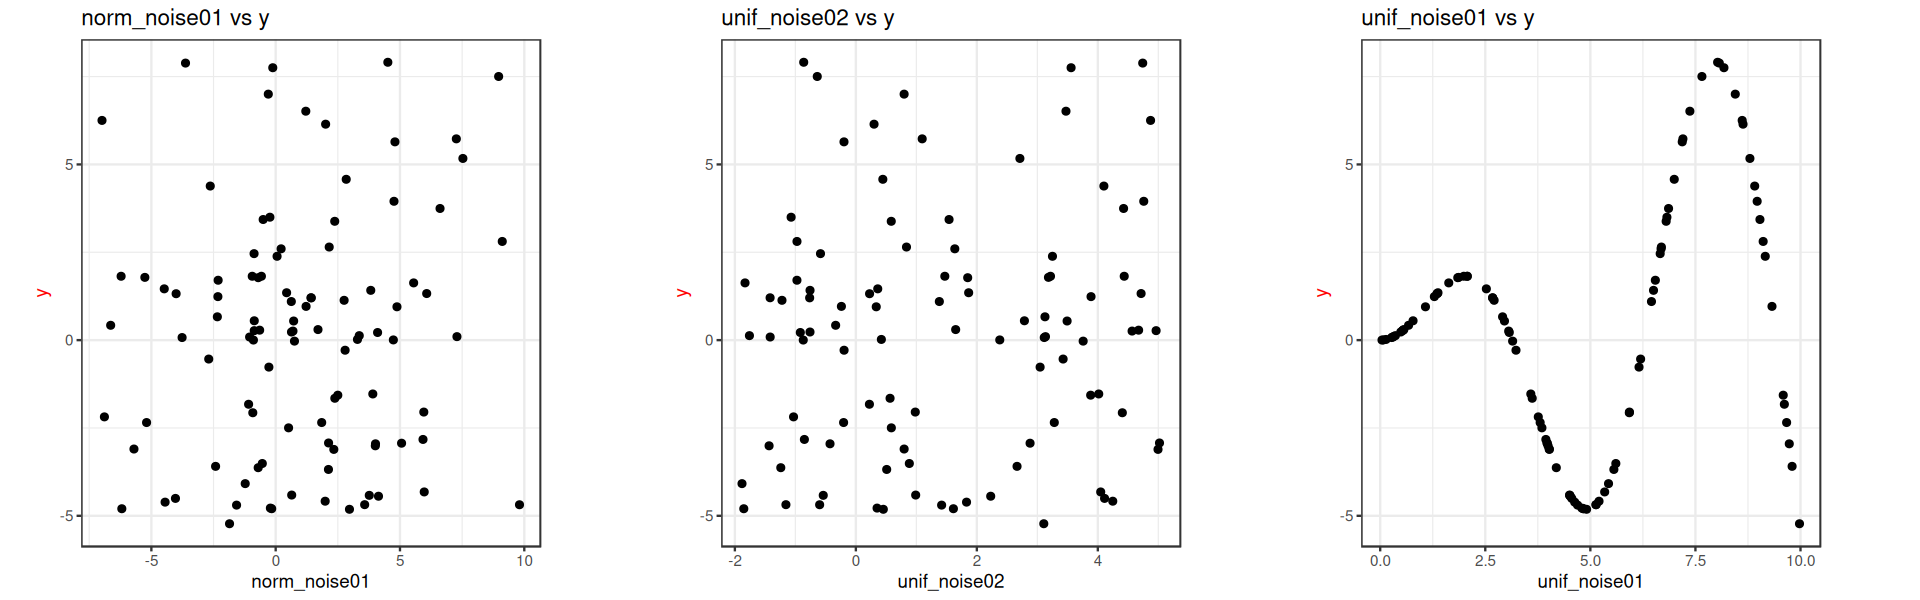

In [26]:
a(16,5)
p0 <- ggplot(df_simu_classif_regress_sinus, aes(x=norm_noise01, y=y)) +
    geom_point() + ggtitle("norm_noise01 vs y") + theme_bw() + theme(legend.title=element_blank()) +
    theme(axis.title.y = element_text(color = "red")) +
    theme(plot.margin = margin(5, 60, 5, 20))
p1 <- ggplot(df_simu_classif_regress_sinus, aes(x=unif_noise02, y=y)) +
    geom_point() + ggtitle("unif_noise02 vs y") + theme_bw() + theme(legend.title=element_blank()) +
    theme(axis.title.y = element_text(color = "red")) +
    theme(plot.margin = margin(5, 60, 5, 20))
p2 <- ggplot(df_simu_classif_regress_sinus, aes(x=unif_noise01, y=y)) +
    geom_point() + ggtitle("unif_noise01 vs y") + theme_bw() + theme(legend.title=element_blank()) +
    theme(axis.title.y = element_text(color = "red")) +
    theme(plot.margin = margin(5, 60, 5, 20))
pscenar6 <- grid.arrange(p0, p1, p2, ncol = 3, nrow = 1)


# Création du panel




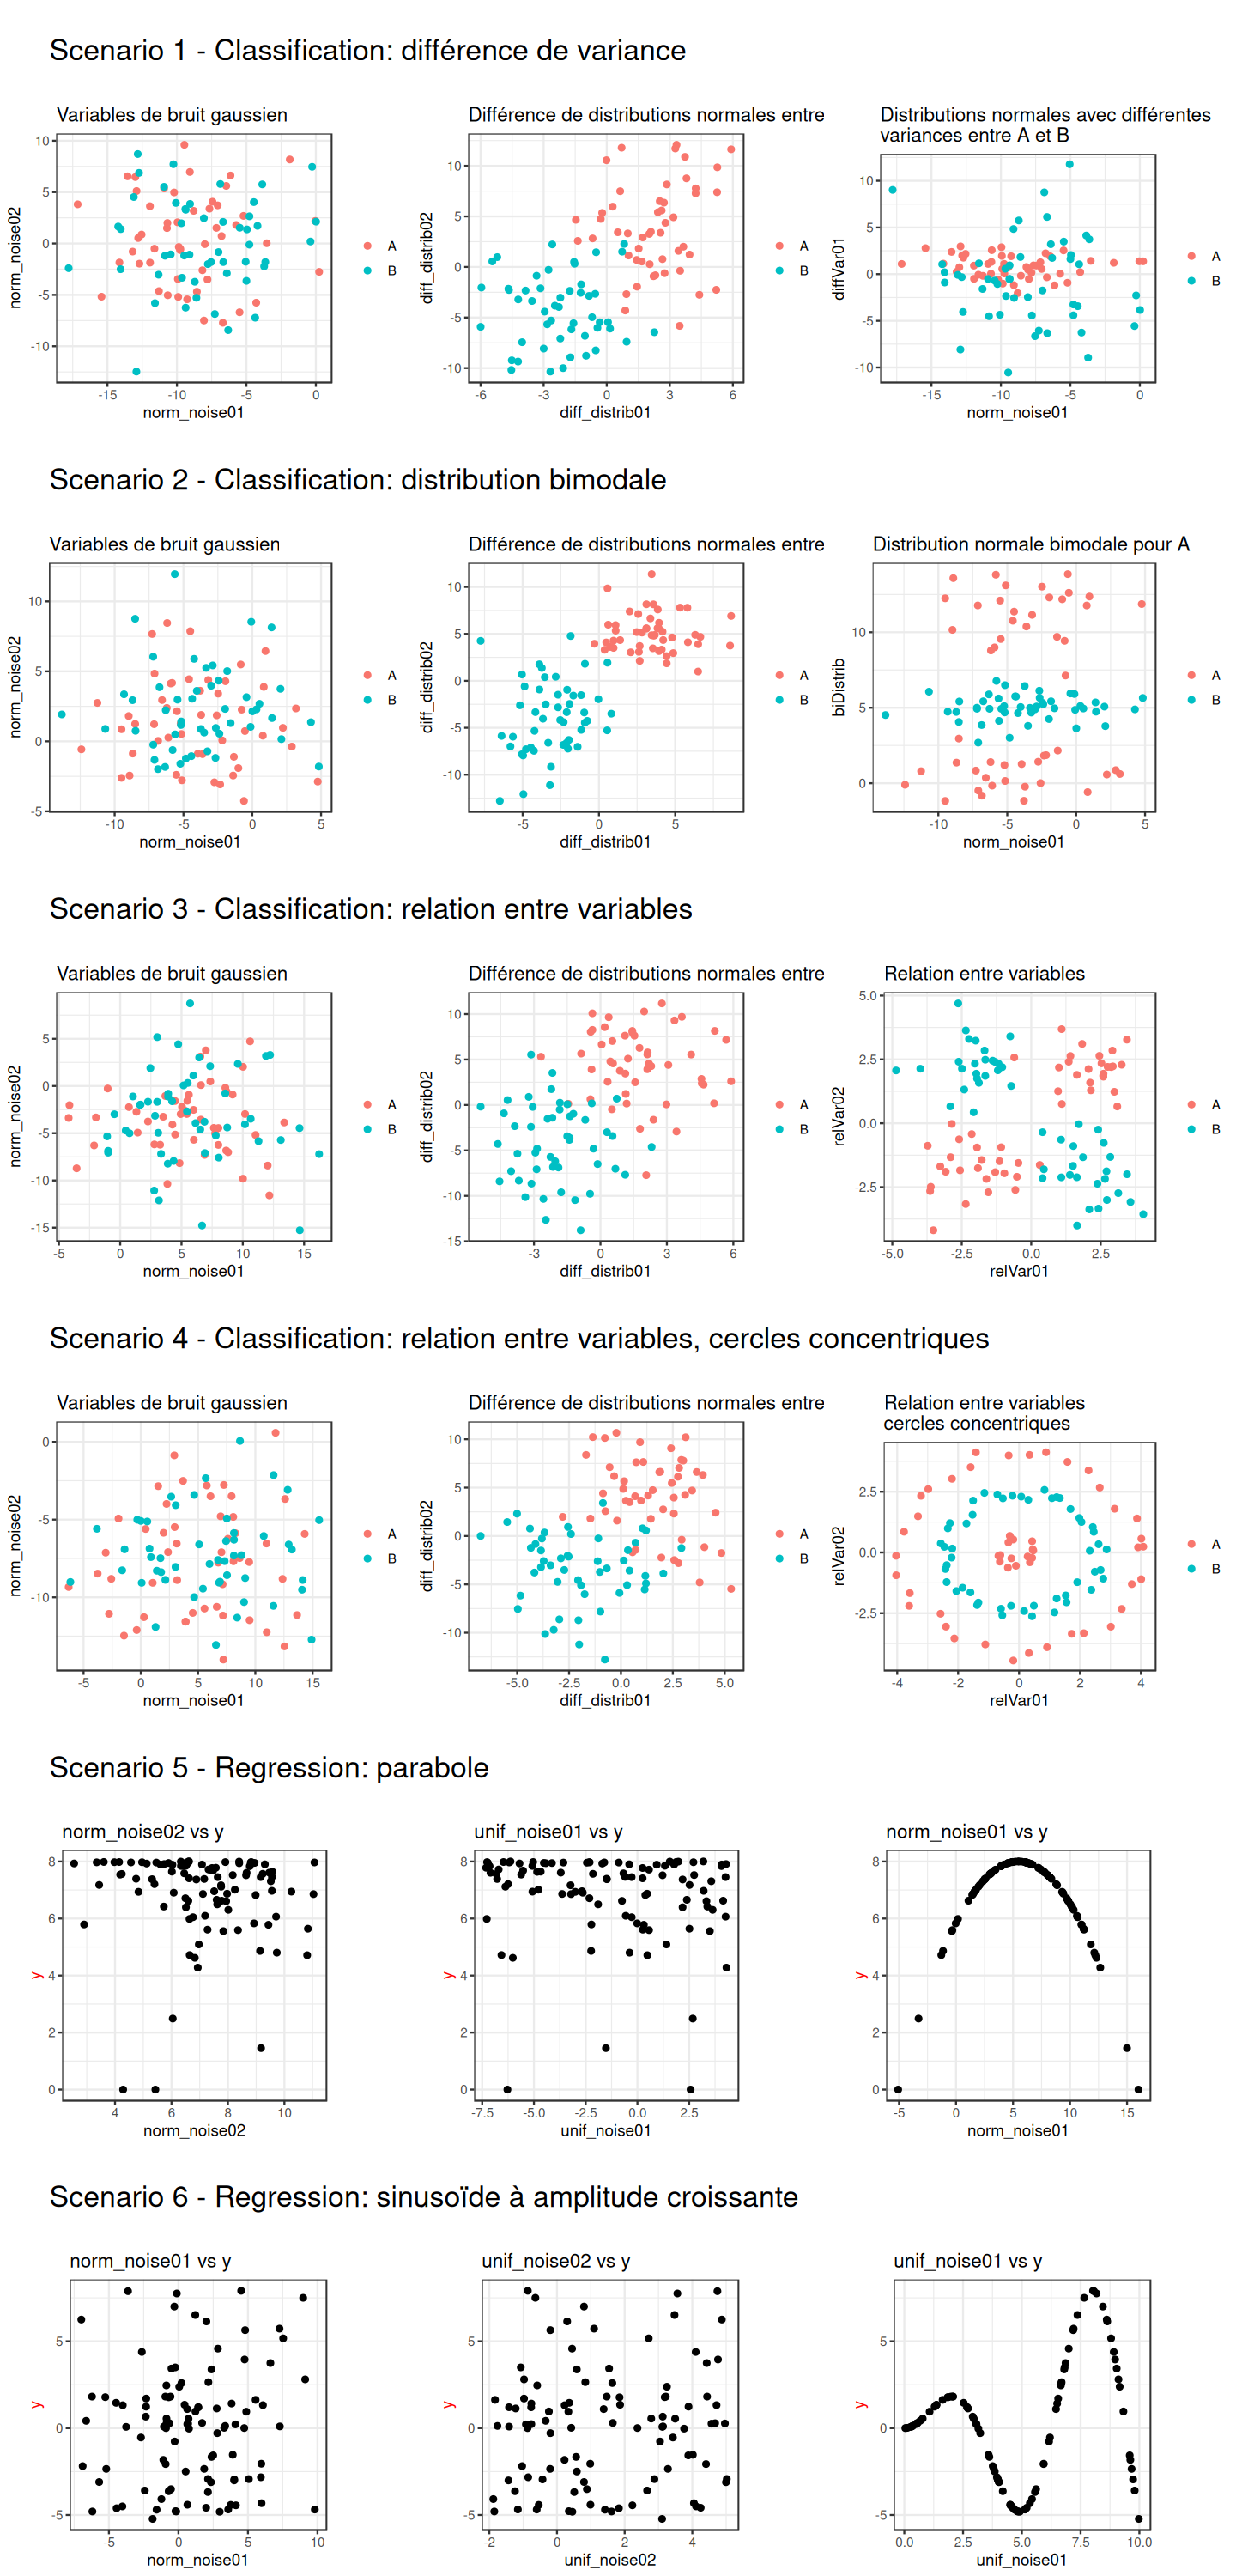

In [27]:
a(12,25)
title_font_size <- 20
title_x <- 0.04
first_height <- 0.3
# Création du panel avec annotations
panel_scenarios <- grid.arrange(
    arrangeGrob(
        textGrob("Scenario 1 - Classification: différence de variance", gp=gpar(fontsize=title_font_size), x=title_x, just="left"), 
        pscenar1,
        heights=c(first_height, 1), ncol=1
    ),
    arrangeGrob(
        textGrob("Scenario 2 - Classification: distribution bimodale", gp=gpar(fontsize=title_font_size), x=title_x, just="left"), 
        pscenar2,
        heights=c(first_height, 1), ncol=1
    ),
    arrangeGrob(
        textGrob("Scenario 3 - Classification: relation entre variables", gp=gpar(fontsize=title_font_size), x=title_x, just="left"), 
        pscenar3,
        heights=c(first_height, 1), ncol=1
    ),
    arrangeGrob(
        textGrob("Scenario 4 - Classification: relation entre variables, cercles concentriques", gp=gpar(fontsize=title_font_size),
        x=title_x, just="left"), 
        pscenar4,
        heights=c(first_height, 1), ncol=1
    ),
    arrangeGrob(
        textGrob("Scenario 5 - Regression: parabole", gp=gpar(fontsize=title_font_size), x=title_x, just="left"), 
        pscenar5,
        heights=c(first_height, 1), ncol=1
    ),
    arrangeGrob(
        textGrob("Scenario 6 - Regression: sinusoïde à amplitude croissante", gp=gpar(fontsize=title_font_size), x=title_x, just="left"), 
        pscenar6,
        heights=c(first_height, 1), ncol=1
    ),
    ncol = 1, nrow = 6
)

# Sauvegarde du panel
ggsave(filename = "im/figs/0005_panel_scenarios.png", plot = panel_scenarios, width = 12, height = 25, dpi = 100)